In [3]:
#-----------------------------------------------------------------------
# pure_diag_continuous_E[vv1+vv2].py
# Author: Rebecca Barber
# 
# calculate the expected max virtual value of the favorite item +
# max virtual value of the non-favorite item for n bidders. 
# relevant flow: the pure diagonal one in the continuous setting
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ER draws

In [12]:
# draw w and beta
def draw_alpha_beta():
    alpha = random()
    beta = random()
    return alpha, beta

# Flow Simulation

In [140]:
# CALCULATE MAX SUM OR SUM OF MAXES????
def calc_vv_sum(n):
    # calc vvs for each bidder
    vv1s = []
    vv2s = []
    vv_sums = []
    
    for i in range(n):
        alpha, beta = draw_alpha_beta()
        
#         denom1 = (1-alpha) * (1-beta)**2
#         denom2 = (1-beta+alpha*beta)**2
        
#         vv1 = 2/denom1
#         vv2 = 2/denom2

          # becky's way, lambda = -alpha^2
#         vv1 = (2-alpha) / ((1-alpha)**2)
#         vv2 = (2-alpha*beta) / ((1-alpha*beta)**2)
        
        # matt's way, lambda = 1-alpha^2
        # matt things that vv1 = -1/alpha but I think that he made a calculation error?
#         vv1 = (3 * alpha - 1) / (alpha*(1-alpha)) #-1/alpha
#         vv2 = (2*alpha-beta-alpha**2 * beta) / (alpha * (1-alpha*beta)**2) 

#         vv1 = log(1/(1-alpha))
#         vv2 = log(1/(1-beta))
        
          # works but ... what is this
#         vv1 = log(alpha) * (log(alpha)*log(beta) - 2)
#         vv2 = log(beta) * (log(beta)*log(beta) - 2)

          # bad
#         vv1_term1 = (2*alpha)/(alpha**2 * log(alpha+1))
#         vv1_term2 = 2/(alpha**2)
#         vv1 = vv1_term1 + vv1_term2
        
#         vv2_term1 = (-2 * log(2))/(beta*log(alpha+1))
#         vv2_term2 = -1 * (2*((alpha+1)*log(alpha+1) - alpha) * (log(2))**2)/((log(alpha+1))**3 * beta**2)
#         vv2 = vv2_term1 + vv2_term2

        vv1 = alpha
        vv2 = log(1/beta)

        
        vv_sums.append(vv1 + vv2)
        vv1s.append(vv1)
        vv2s.append(vv2)
    
    return max(vv1s) + max(vv2s)
#     return max(vv_sums)

# Variable Updates

In [141]:
num_trials = 1000 #100000
min_bidders = 100
max_bidders = 500
bidder_step = 10

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


# Main

In [142]:
avg_vv_sums = []

print('number of bidders:')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print(n, end = "")

    # run num_trials for each # of bidders so we can 
    # take the average
    all_vv_sums = []
    for i in range(num_trials):
        vv_sum = calc_vv_sum(n)
        all_vv_sums.append(vv_sum)  
    mean_vv_sum = mean(all_vv_sums)
    avg_vv_sums.append(mean_vv_sum)
    print(':', mean_vv_sum)

# save all of the data
csv_file = './data/pure_diag_continuous_E[vv1+vv2]_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg (vv_1 + vv2)'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_vv_sum = avg_vv_sums[i]
    df = df.append({'num bidders': n, 'avg (vv_1 + vv2)': avg_vv_sum}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:
100: 6.200928820569153
110: 6.235000488172593
120: 6.364712085177109
130: 6.402430668550302
140: 6.516949128387837
150: 6.662083900894324
160: 6.646813456441285
170: 6.690012672576892
180: 6.748162185397441
190: 6.815601620519195
200: 6.8715689350192735
210: 6.874240567847325
220: 7.007885489942165
230: 6.953123776857856
240: 7.102550618672573
250: 7.155204818898028
260: 7.152425967074615
270: 7.192995874887727
280: 7.218832892864609
290: 7.225111607178138
300: 7.296779876596087
310: 7.303317993843653
320: 7.299290192767438
330: 7.376293936966962
340: 7.453588436241843
350: 7.432339266106821
360: 7.492511659900317
370: 7.490805696755847
380: 7.511100619965488
390: 7.496847152565604
400: 7.515061961271628
410: 7.637487227855544
420: 7.596227625455346
430: 7.7191520292454925
440: 7.707498078647771
450: 7.686302907429317
460: 7.775530658177395
470: 7.691454801105975
480: 7.7189610474473245
490: 7.854336192904608
500: 7.804185613330428


# Plotting

<Figure size 648x360 with 0 Axes>

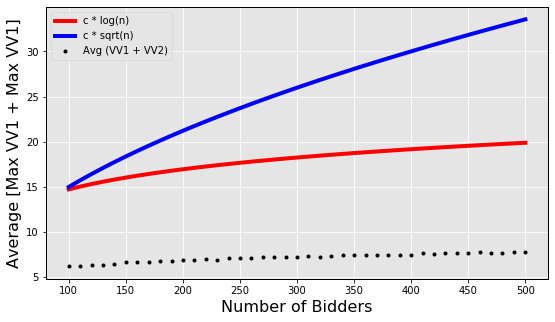

In [143]:
# plot the results
log_bench = [3.2*np.log(n) for n in num_bidders]
sqrt_bench = [1.5*np.sqrt(n) for n in num_bidders]

figure_name = './figures/pure_diag_continuous_E[vv1+vv2]_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.png'

plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
        num_bidders, sqrt_bench, 'b-',
         num_bidders, avg_vv_sums,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c * log(n)', 'c * sqrt(n)', 'Avg (VV1 + VV2)'])
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Average [Max VV1 + Max VV1]', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')

In [144]:
# For fitting y = B + A log x, just fit y against (log x)
# For fitting y = B + A sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), avg_vv_sums, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_vv_sums, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

log fit: 
a = 1.015223859978424 
b = 1.4953913464949717 
error = 0.05721033322384855

sqrt fit: 
a = 0.12734947500880944 
b = 5.034325706881687 
error = 0.14249298813278824
